In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
users = pd.read_csv("data/ml-latest-small/ratings.csv")
users.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
columns_names = ['movieId','movie_title','genres']
movies = pd.read_csv("data/ml-latest-small/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies_df = movies[['movieId','title']]

In [6]:
users = pd.merge(users,movies_df,on ='movieId')

In [7]:
users.head()

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


In [8]:
sns.set_style("white")
%matplotlib inline

In [10]:
users.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [12]:
users.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [13]:
ratings = pd.DataFrame(users.groupby('title')['rating'].mean())

In [14]:
ratings['number_of_ratings'] = users.groupby('title')['rating'].count()

In [15]:
ratings.sort_values('number_of_ratings',ascending = False).head()

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


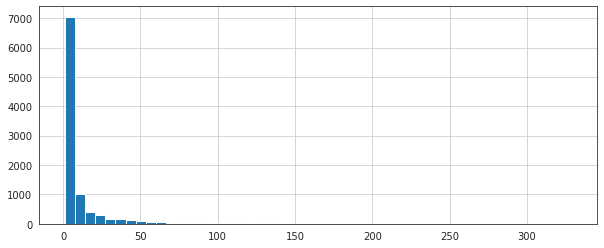

In [16]:
plt.figure(figsize = (10,4))
ratings['number_of_ratings'].hist(bins= 50)

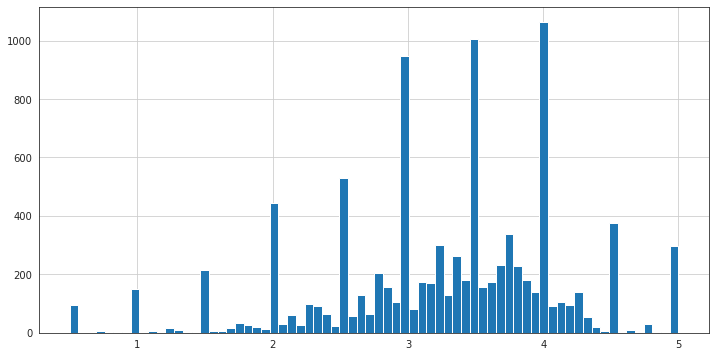

In [17]:
plt.figure(figsize = (12,6))
ratings['rating'].hist(bins= 70)

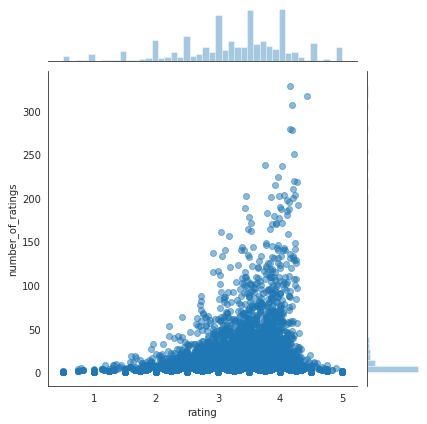

In [18]:
sns.jointplot(x = 'rating',y = 'number_of_ratings',data = ratings,alpha = 0.5)

In [21]:
movie_matrix = users.pivot_table(index = 'userId', columns = 'title',values = 'rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
ratings.sort_values('number_of_ratings',ascending = False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [24]:
users_ratings_gump = movie_matrix['Forrest Gump (1994)']
users_ratings_pulp = movie_matrix['Pulp Fiction (1994)']

In [41]:
similar_to_gump  = movie_matrix.corrwith(users_ratings_gump)
corr_gump = pd.DataFrame(similar_to_gump,columns = ['Correlation'])
corr_gump.dropna(inplace = True)
corr_gump.sort_values('Correlation',ascending = False).head(10)
corr_gump = corr_gump.join(ratings['number_of_ratings'])
corr_gump[corr_gump['number_of_ratings'] > 70].sort_values('Correlation',ascending = False).head(10)

,Correlation,number_of_ratings
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Big (1988),0.492351,91
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
"Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)",0.461204,72
American History X (1998),0.457287,129
Contact (1997),0.438597,82
"Truman Show, The (1998)",0.432556,125


In [42]:
similar_to_pulp  = movie_matrix.corrwith(users_ratings_pulp)
corr_pulp = pd.DataFrame(similar_to_pulp,columns = ['Correlation'])
corr_pulp.dropna(inplace = True)
corr_pulp.sort_values('Correlation',ascending = False).head(10)
corr_pulp = corr_pulp.join(ratings['number_of_ratings'])
corr_pulp[corr_pulp['number_of_ratings'] > 70].sort_values('Correlation',ascending = False).head(10)

,Correlation,number_of_ratings
title,,
Pulp Fiction (1994),1.000000,307
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Interstellar (2014),0.503411,73
Requiem for a Dream (2000),0.463093,96
Mary Poppins (1964),0.458205,71
"Fish Called Wanda, A (1988)",0.449683,71
Trainspotting (1996),0.437714,102
Kill Bill: Vol. 2 (2004),0.421685,110
